# Molecular Dynamics Simulation of a Protein

In this activity, we will replicate the first published simulation of a protein from 1977.

*McCammon, J. A.; Gelin, B. R.; Karplus, M. Nature 1977, 267 (5612), 585–590.*

In [1]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
from sys import stdout

import time as time

## Simulation Parameters

In [2]:
import os 

topology_file = 
initial_coordinate_file = 

temperature = 

prmtop = app.AmberPrmtopFile(topology_file)
inpcrd = app.AmberInpcrdFile(initial_coordinate_file)

system = prmtop.createSystem(nonbondedMethod=app.NoCutoff, constraints=None)

integrator = mm.LangevinIntegrator()

platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(prmtop.topology, system, integrator, platform)
simulation.context.setPositions(inpcrd.positions)


## Minimization

In [ ]:
st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

print('Minimizing...')
simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

# Equilibration

In [ ]:
# Equilibrate for 1000 steps.

simulation.context.setVelocitiesToTemperature(298.15*unit.kelvin)
print('Equilibrating...')
simulation.step(1000)
print('Done!')

# Production Simulation

In [ ]:
simulation.reporters.append(app.DCDReporter('BPTI_sim.dcd', 1))
simulation.reporters.append(app.StateDataReporter(stdout, 250, step=True, time=True,
    potentialEnergy=True, temperature=True, speed=True, separator='\t'))

tinit=time.time()

print('Running Production...')

simulation.step()
tfinal=time.time()

print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

# Analysis

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import nglview as ngl

In [ ]:
# Load trajectorry using mdtraj
traj = md.load('BPTI_sim.dcd', top=topology_file)

## View Trajectory

In [ ]:
visualize = ngl.show_mdtraj(traj)
visualize

In [4]:
# We can get the atom and bond information using mdtraj. This loads the bond and atom information
# into a dataframe (from the Python library pandas). MolSSI has a pandas tutorial if you want to learn
# more - https://education.molssi.org/python-data-analysis/02-pandas/index.html
atoms = 

In [6]:
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,None,N,N,0,ARG,0,
1,None,H,H,0,ARG,0,
2,None,H2,H,0,ARG,0,
3,None,H3,H,0,ARG,0,
4,None,CA,C,0,ARG,0,
...,...,...,...,...,...,...,...
887,None,HB2,H,57,ALA,0,
888,None,HB3,H,57,ALA,0,
889,None,C,C,57,ALA,0,
890,None,O,O,57,ALA,0,


In [19]:
# You can slice this the same way we sliced numpy arrays, but you have to add .iloc to the variable name.

# Information for the first 10 atoms


,serial,name,element,resSeq,resName,chainID,segmentID
0,None,N,N,0,ARG,0,
1,None,H,H,0,ARG,0,
2,None,H2,H,0,ARG,0,
3,None,H3,H,0,ARG,0,
4,None,CA,C,0,ARG,0,
5,None,HA,H,0,ARG,0,
6,None,CB,C,0,ARG,0,
7,None,HB2,H,0,ARG,0,
8,None,HB3,H,0,ARG,0,
9,None,CG,C,0,ARG,0,


In [32]:
# We are going to analyze an N-C alpha bond in a phenylalanine 
# residue - http://www.bmrb.wisc.edu/referenc/commonaa.php?phe
atoms.iloc[[349, 351]]

,serial,name,element,resSeq,resName,chainID,segmentID
349,None,N,N,21,PHE,0,
351,None,CA,C,21,PHE,0,


In [ ]:
# Plotting C alpha N bond

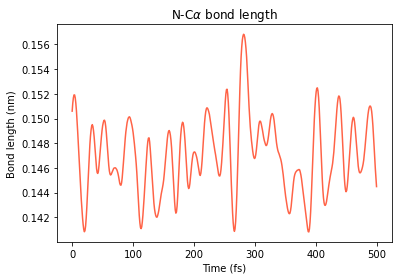

In [25]:
bond_indices = [349, 351]
NClength = md.compute_distances(traj, [bond_indices])

t_start = 5000 # start at step 5000
t_step = 500 # plot over 0.5 ps

t_end = t_start + t_step

plt.plot(NClength[t_start:t_end], color='Tomato')
plt.title(r'N-C$\alpha$ bond length')
plt.xlabel('Time (fs)')
plt.ylabel(r'Bond length (nm)')
plt.show()

,serial,name,element,resSeq,resName,chainID,segmentID
349,None,N,N,21,PHE,0,
350,None,H,H,21,PHE,0,
351,None,CA,C,21,PHE,0,
352,None,HA,H,21,PHE,0,
353,None,CB,C,21,PHE,0,
354,None,HB2,H,21,PHE,0,
355,None,HB3,H,21,PHE,0,
356,None,CG,C,21,PHE,0,
357,None,CD1,C,21,PHE,0,
358,None,HD1,H,21,PHE,0,


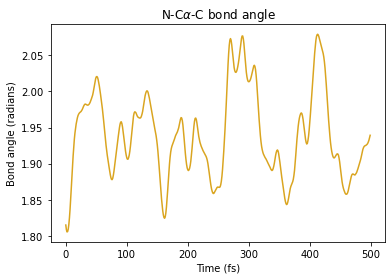

In [30]:
# Plotting C alpha N C angle

angle_indices = [349, 351, 367]
bondangle = md.compute_angles(traj, [angle_indices])

plt.plot(bondangle[t_start:t_end], color='Goldenrod')
plt.title(r'N-C$\alpha$-C bond angle')
plt.xlabel('Time (fs)')
plt.ylabel('Bond angle (radians)')
plt.show()